<a href="https://colab.research.google.com/github/sauravsingla/Outlier_Detection_Tutorials/blob/master/Tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN



In [ ]:
!pip install pyod
!pip install --upgrade pyod  

     |████████████████████████████████| 102kB 7.4MB/s 
     |████████████████████████████████| 2.1MB 19.2MB/s 
  Created wheel for pyod: filename=pyod-0.8.2-cp36-none-any.whl size=110198 sha256=9fbdee4f02e7fe7e8443258c74bcb20ddbcfb9200a8d877269635684cc22e1e5
  Stored in directory: /root/.cache/pip/wheels/3a/ea/04/dbd99df8826a3d22139f44404cd14641615cd47ec2171cfe60
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=773054177cd3a3b01f52975a8d8dad002d6763acd508b432ae12ffac9007a77a
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167158 sha256=8948f151d7cc26d9fb7476831d8a263e8093258b24913514d525e648a1be6a16
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod
Requirement already up-to-date: pyod in /usr/local/lib/python3.6/dist-packages (0.8.2)


PyOD embedded functions used to create a random dataset with a fraction of outliers

/usr/local/lib/python3.6/dist-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


Text(0, 0.5, 'feature_2')

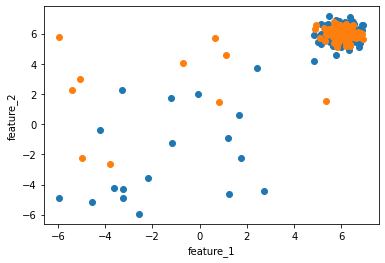

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
outlier_fraction = 0.1  
n_train = 200 
n_test = 100
X_train, y_train, X_test, y_test = generate_data(n_train=n_train, n_test=n_test, contamination=outlier_fraction)
#plot train and test set
feature_1_train = X_train[:,[0]].reshape(-1,1)
feature_2_train = X_train[:,[1]].reshape(-1,1)
feature_1_test = X_test[:,[0]].reshape(-1,1)
feature_2_test = X_test[:,[1]].reshape(-1,1)
#scatter plot 
plt.scatter(feature_1_train,feature_2_train)
plt.scatter(feature_1_test,feature_2_test)
plt.xlabel('feature_1')
plt.ylabel('feature_2')

Train and make predictions with KNN model

In [ ]:
knn=KNN(contamination=outlier_fraction)
knn.fit(X_train)
# prediction labels and outlier scores of the training data
y_train_pred = knn.labels_  
y_train_scores = knn.decision_scores_ 
# prediction on the test data
y_test_pred = knn.predict(X_test)  
y_test_scores = knn.decision_function(X_test)
# errors in test set
n_errors = (y_test_pred != y_test).sum()
print('No of Errors in test set: {}'.format(n_errors))
# accuracy in test set
print('Accuracy in test set: {}'.format((n_test-n_errors)/n_test))

No of Errors in test set: 0
Accuracy in test set: 1.0


KNN algorithm was able to correctly classify almost all the outliers

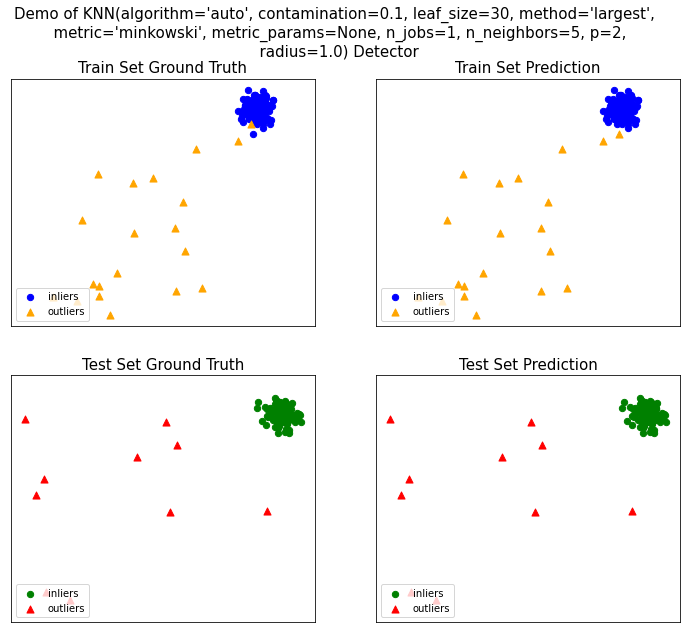

In [ ]:
from pyod.utils import example
example.visualize(knn, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)